# Credit Card Fraud Detection

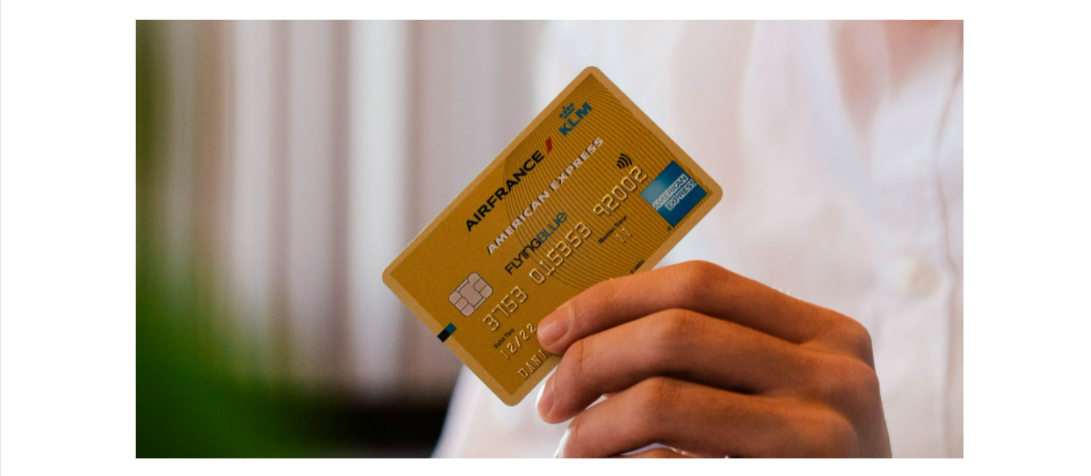

### Introduction

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain.

The aim of this project is to predict fraudulent credit card transactions using machine learning models. We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 


# Variables and Paths

In [114]:
DATA_PATH = r"C:\Users\ChiGa\Desktop\PGD Capstone\creditcard data\creditcard.csv"

# Importing libraries

In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import preprocessing

## Exploratory Data Analysis

In [116]:
df = pd.read_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [117]:
print('Number of Records : {}\nNumber of Columns : {}'.format(df.shape[0],df.shape[1]))

Number of Records : 284807
Number of Columns : 31


In [118]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [120]:
# Checking missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no missing values in any of the columns in the dataset

In [121]:
# Class has to be a categorical variable
df['Class'] = df['Class'].astype(object)

Here we will observe the distribution of our classes

In [122]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [123]:
classes=df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

#### There are 284315 Non-Fraud cases while only 492 Fraud cases in the dataset

In [124]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

df_class = df['Class'].value_counts().to_frame('Count')
df_class.index = ['Non Fraud','Fraud']
df_class['Count'] = df_class['Count']/df.shape[0]
fig = px.bar(df_class, x=df_class.index, y="Count", color="Count", title="Non-Fraud vr Fraud Transactions")
fig.show()

### Distribution of classes with `Time`

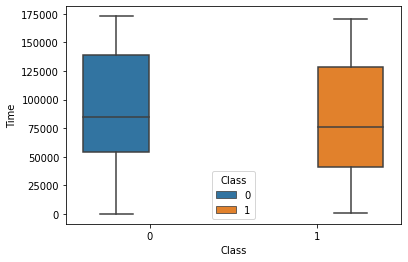

In [125]:
# Create a scatter plot to observe the distribution of classes with time
sns.boxplot(x=df['Class'], y=df['Time'], hue=df['Class'])
plt.show()

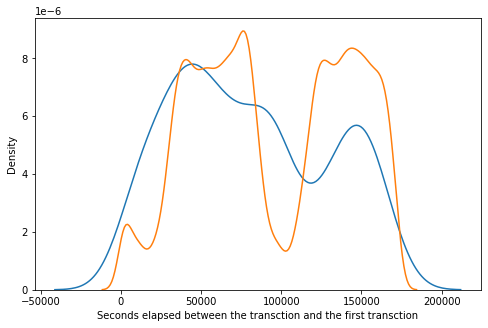

In [13]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

#### We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to `Time`. Hence, we can drop the `Time` column.

In [14]:
# Drop unnecessary columns
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Distribution of classes with `Amount`

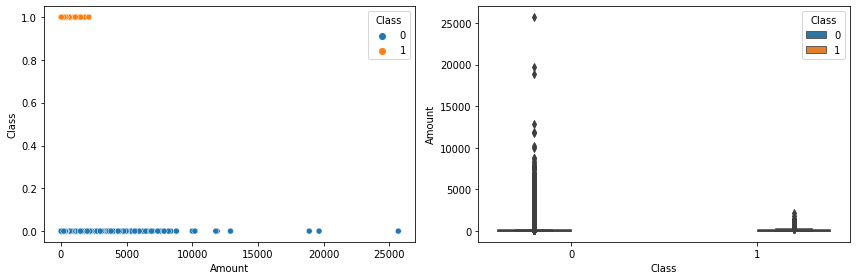

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(y=df['Class'], x=df['Amount'], hue=df['Class'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Class'], y=df['Amount'], hue=df['Class'])
plt.tight_layout()

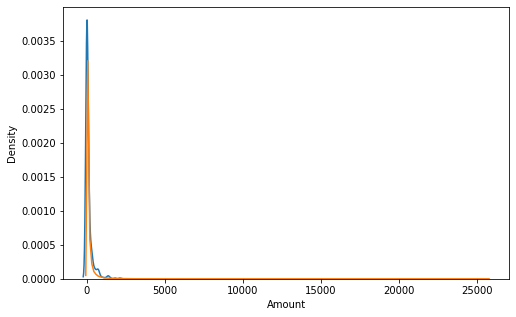

In [131]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Amount'],label='non fraudulent',hist=False)
plt.show()

In [17]:
cols = df.columns
cols = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

### Correlation amongst the variables

<Figure size 2160x2160 with 0 Axes>

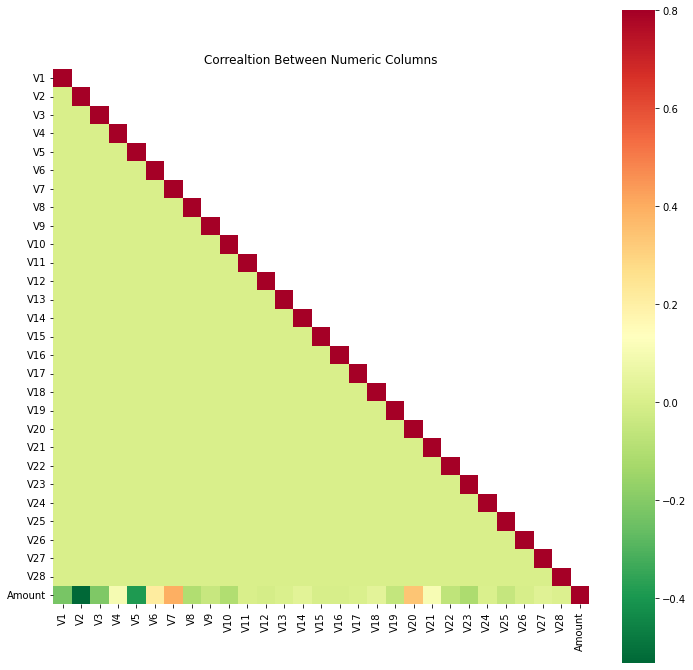

In [20]:
plt.figure(figsize=[30,30])
corr_mat = df[cols].corr()
corr_mat_mask = np.array(corr_mat)
# Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[12,12])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.8, square=True, annot=False, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

There is no strong correlation amongst the features, hence no multicollinearity

We are not considering outlier treatment as all the columns are already PCA transformed, which assumes that the outlier values are taken care while transforming the data.

### Plotting the distribution of a variable

In [127]:
#Creating a plot function
def distPlot(num_cols,df):
  plt.figure(figsize=[20,40])
  for col in num_cols:
    a=num_cols.index(col)+1
    plt.subplot(10,3,a)
    sns.distplot(df[col]).set(title='Dist plot for '+col, xlabel=col)
  plt.tight_layout(pad=2.0)
  plt.show()

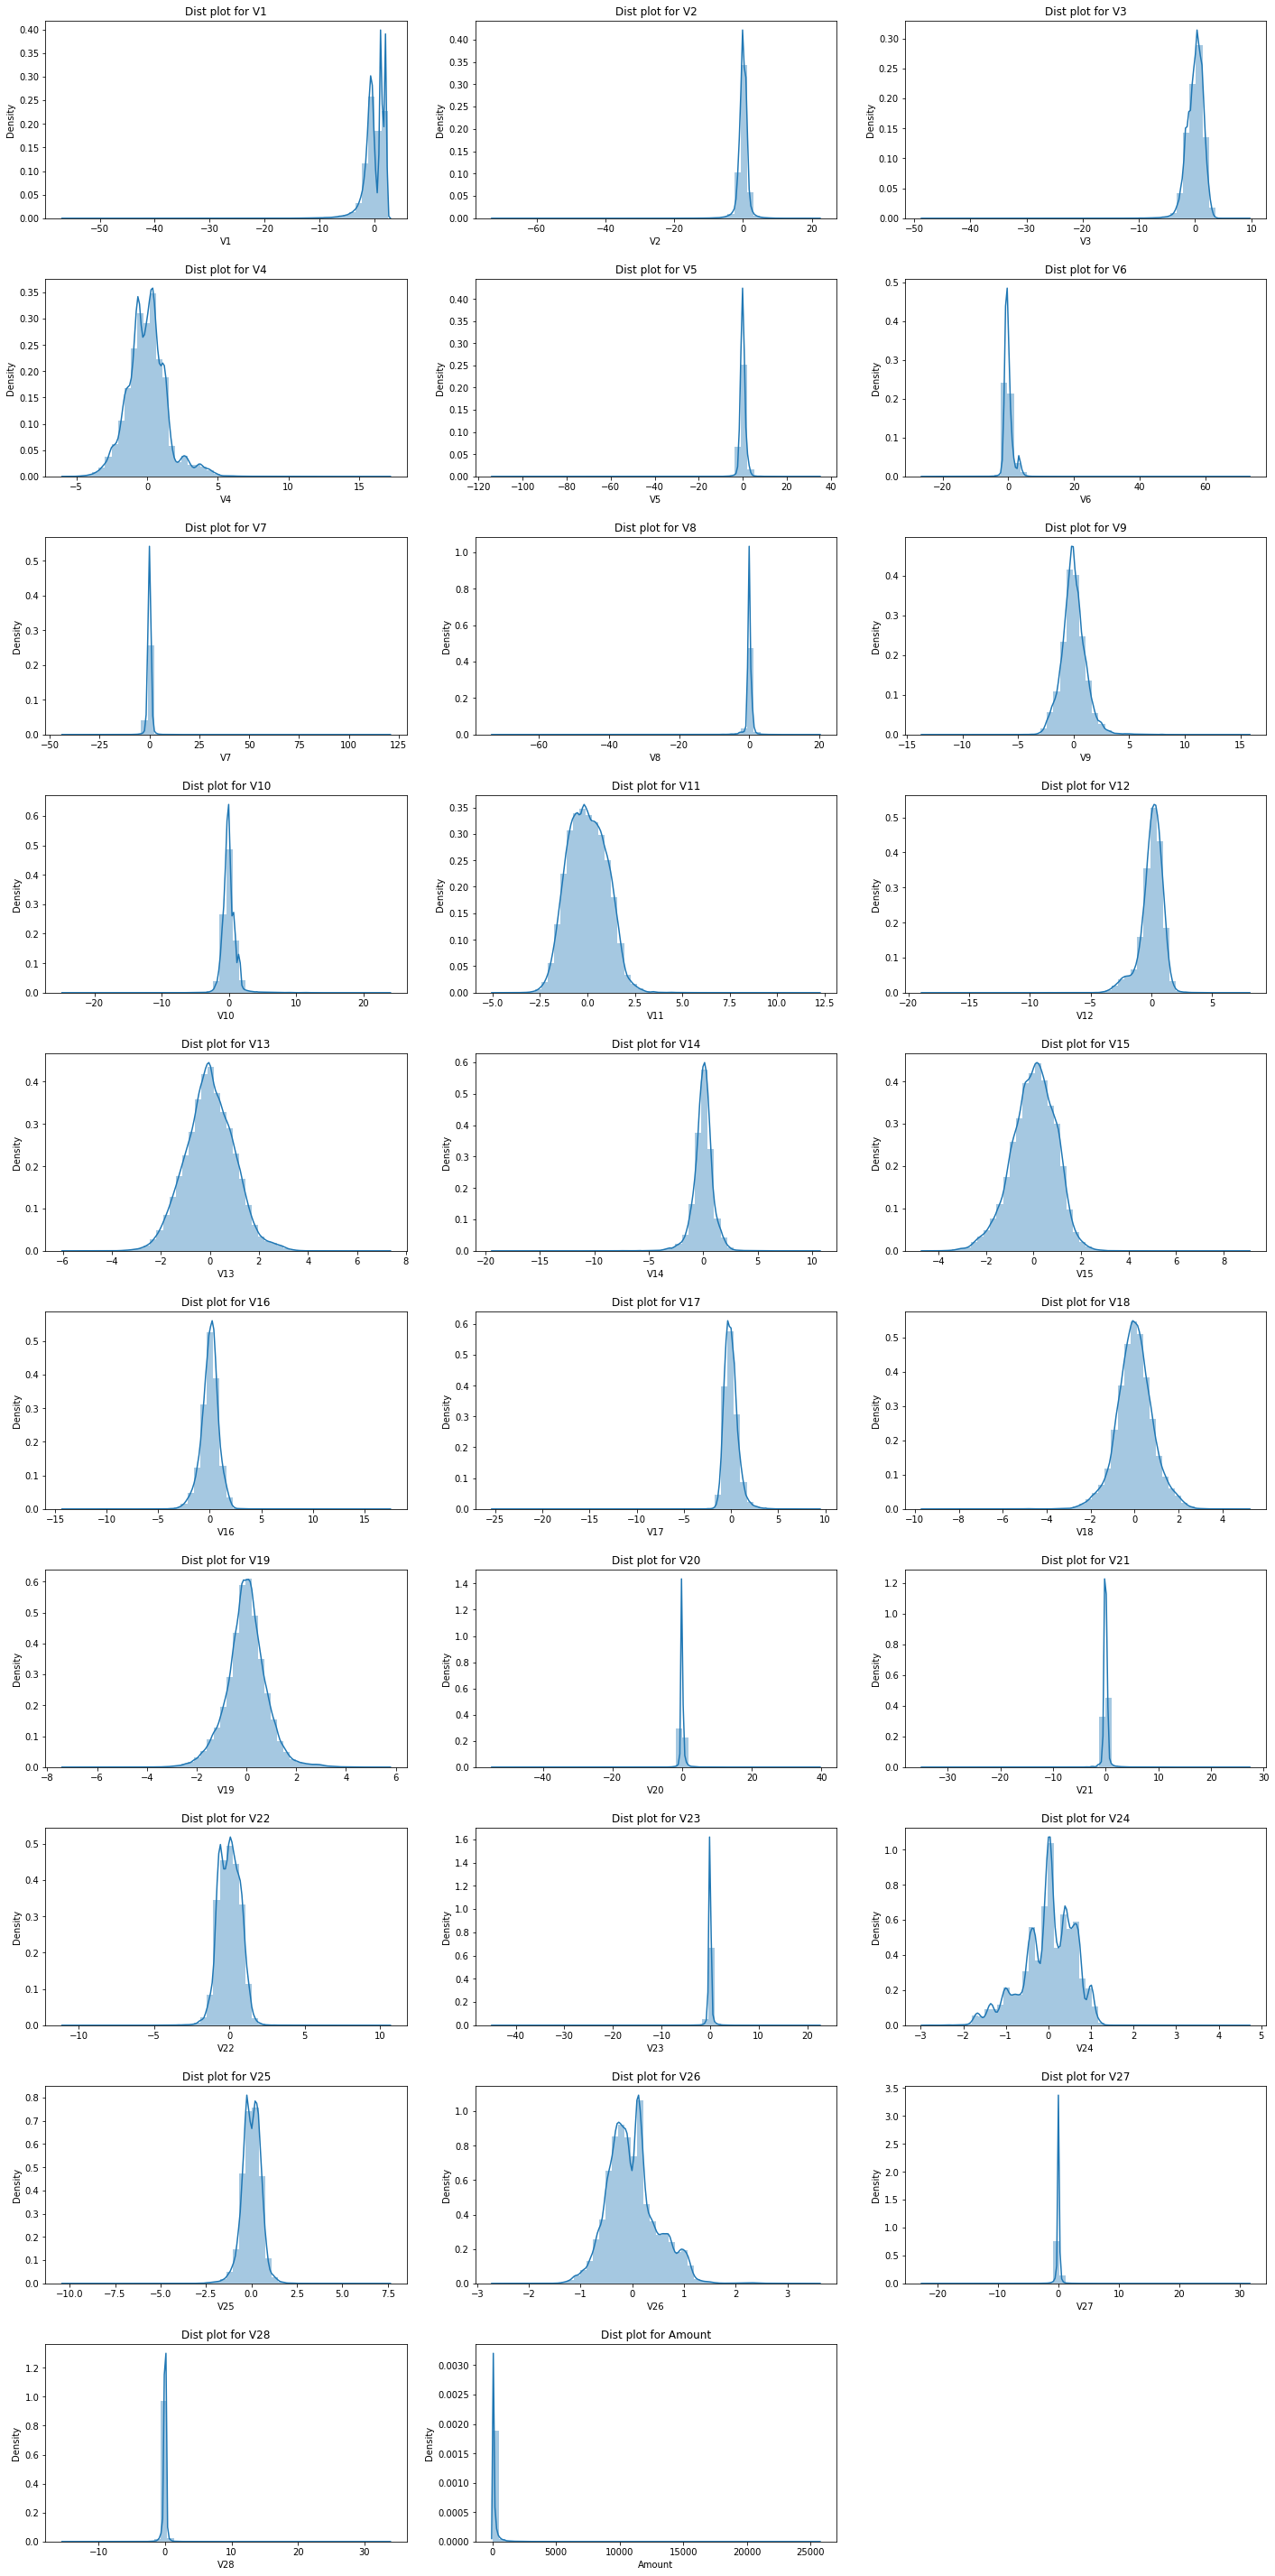

In [128]:
#plot the histogram of a variable from the dataset to see the skewness
distPlot(cols,df)

# Train-Test Split

### Splitting the data into Train & Test data

In [22]:
y = df['Class']
X = df.drop('Class',axis=1)

In [23]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

y_train, y_test = y_train.astype(int), y_test.astype(int)

# Preserved X_test & y_test to evaluate on the test data once model is built

In [134]:
# Split of fraud transactions across train and test dataset
print("Total Fraud cases in dataset   : ",np.sum(y))
print("Total Fraud cases in Train set : ",np.sum(y_train))
print("Total Fraud cases in Test set  : ",np.sum(y_test))

Total Fraud cases in dataset   :  199002
Total Fraud cases in Train set :  342
Total Fraud cases in Test set  :  150


## Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [25]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])

## Skewness

<b> Power Transformer </b> package present in the preprocessing library provided by sklearn helps to make distribution more gaussian

In [26]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
_trans_col = X_train.columns

df_transformed = df.copy()

from sklearn.preprocessing import PowerTransformer

trans_cols = _trans_col

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)


_X_train_transformed = pt.fit_transform(X_train[trans_cols])
_X_test_transformed = pt.fit_transform(X_test[trans_cols])

_df_xtrain_transformed = pd.DataFrame(_X_train_transformed)
_df_xtest_transformed = pd.DataFrame(_X_test_transformed)

_df_xtrain_transformed.columns = _trans_col

#print(list(trans_cols))

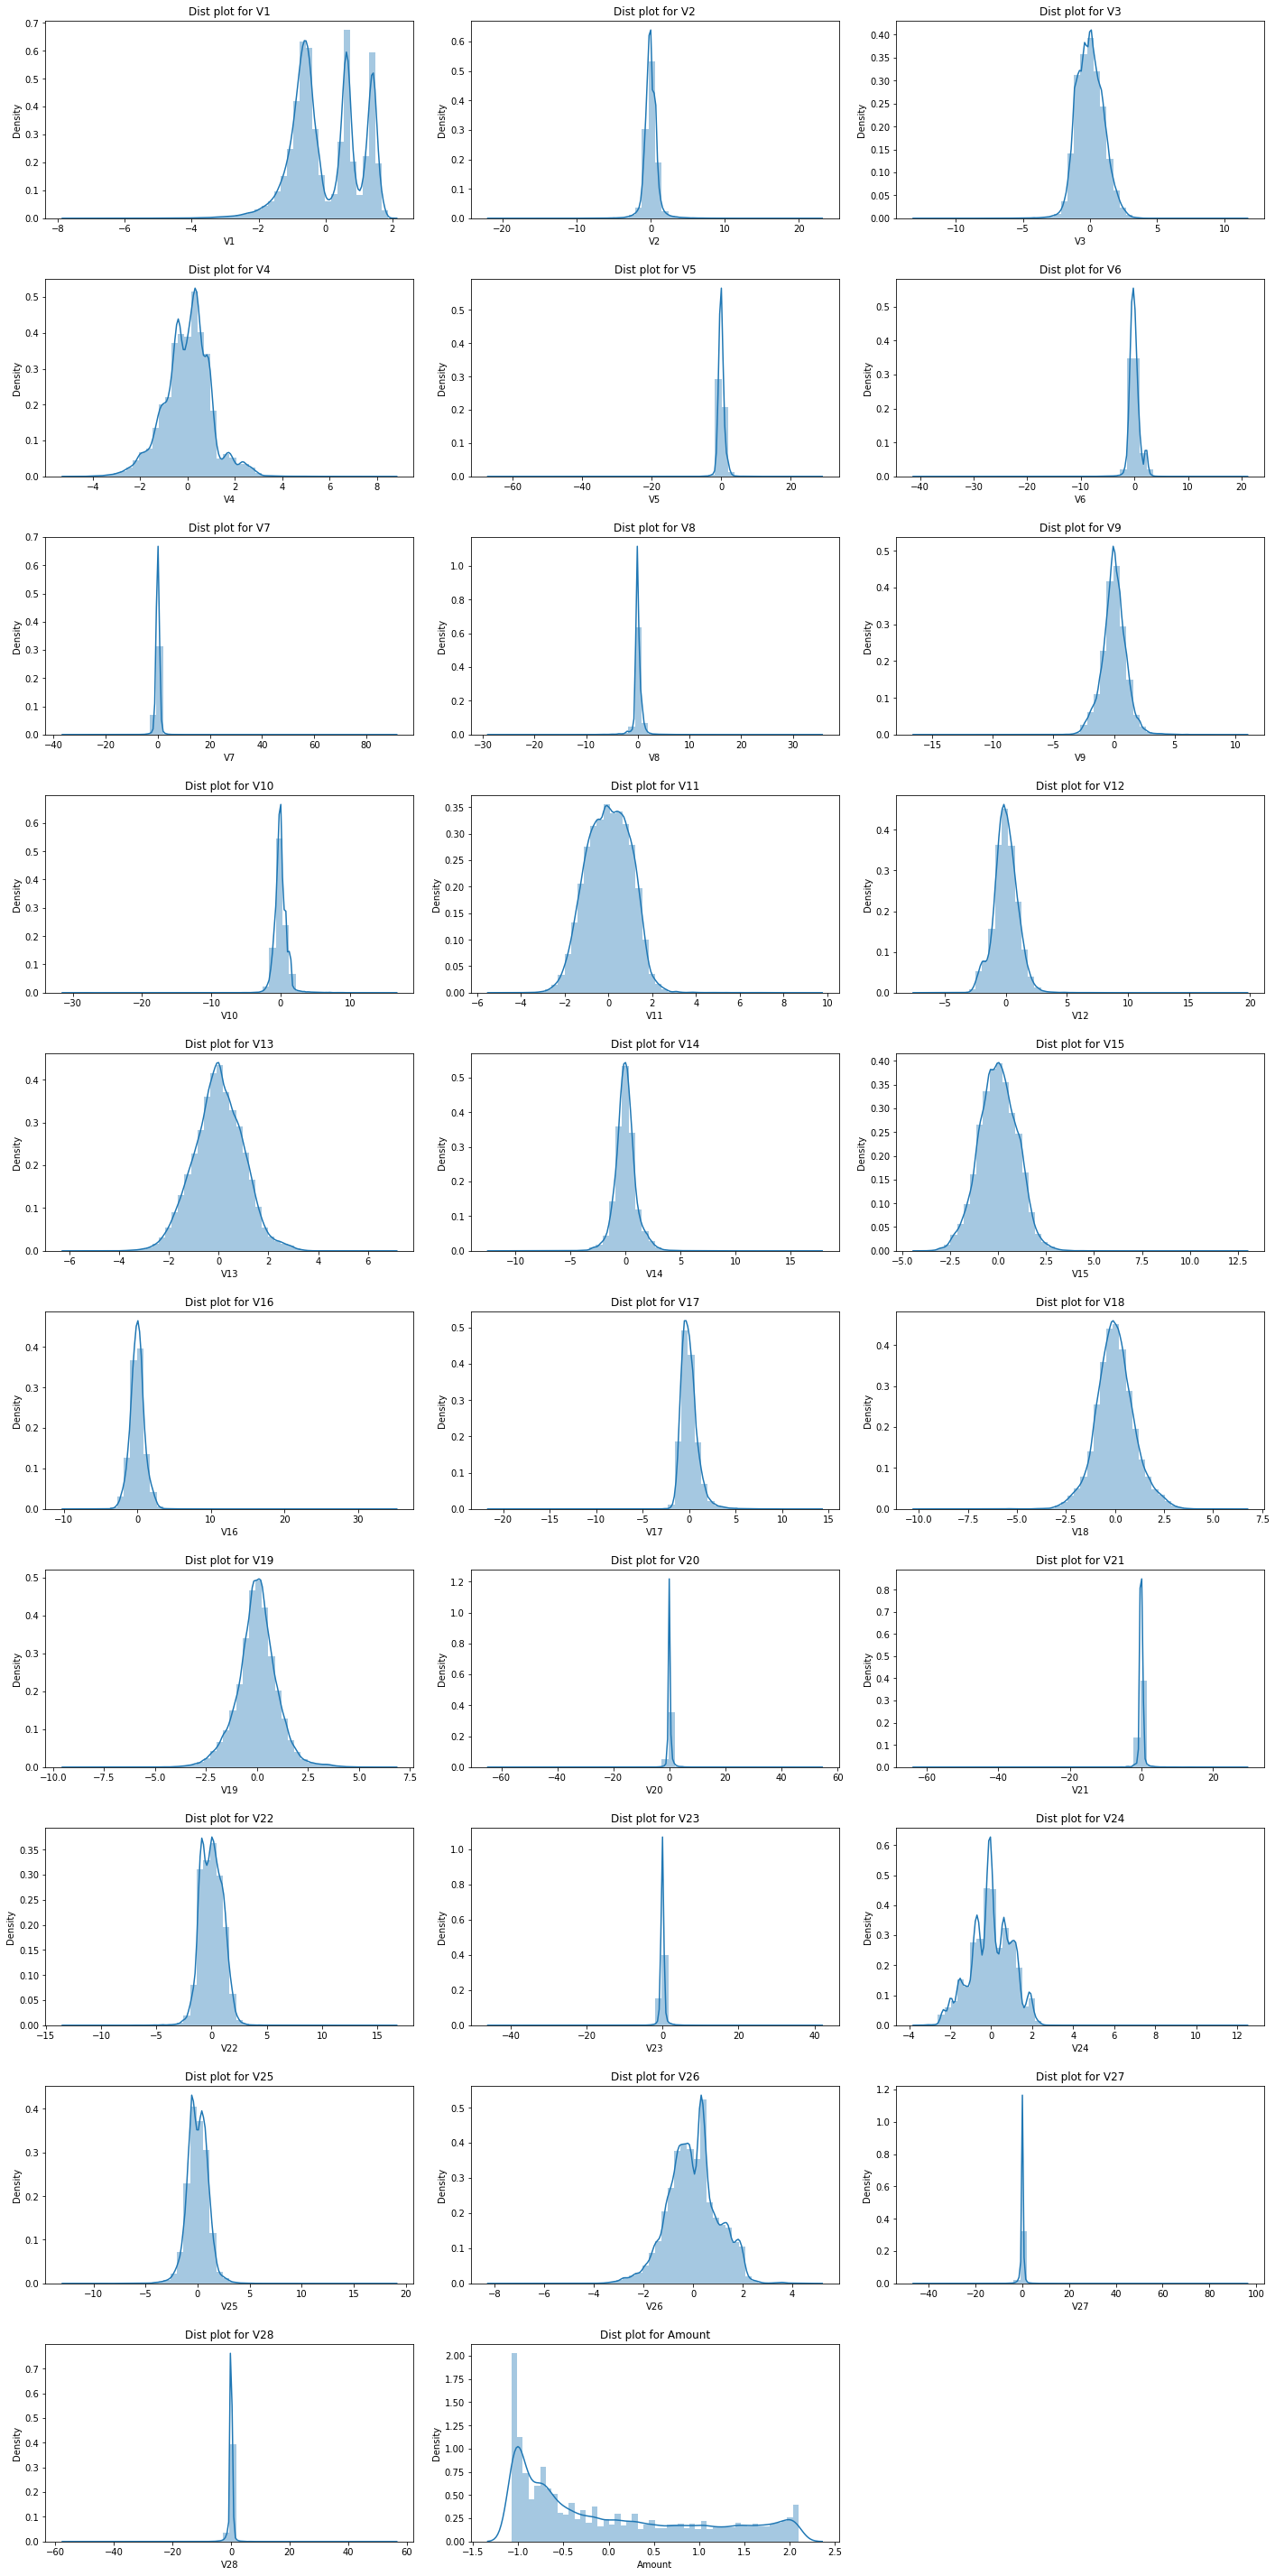

In [129]:
#plot the histogram of a variable from the dataset again to see the result 

distPlot(list(trans_cols),_df_xtrain_transformed)

# Model Building


## Imbalanced Data

- Build different models on the imbalanced dataset and see the result

In [28]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [29]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic:\n\n')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [30]:
# Creating a function to print model summary
def model_summary(model,X,y,train_test):
    print("===="*25)
    print("----"*9+" Performance on "+str(train_test)+" "+"------"*7)
    y_pred = model.predict(X)
    print("===="*25)
    # Confusion matrix
    confusion = metrics.confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n\n",confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("-----"*20)
    # Accuracy
    print("Accuracy: ",metrics.accuracy_score(y, y_pred))
    print("-----"*20)
    # Sensitivity
    print("Sensitivity: ",TP / float(TP+FN))
    print("-----"*20)
    # Specificity
    print("Specificity: ", TN / float(TN+FP))
    print("-----"*20)
    # F1 score
    print("F1-Score: ", f1_score(y, y_pred))
    print("-----"*20)
    # classification_report
    print(classification_report(y, y_pred))
    print("-----"*20)
    # Predicted probability
    y_pred_proba = model.predict_proba(X)[:,1]
    # Plot the ROC curve
    draw_roc(y, y_pred_proba)
    print("====="*20)

    return None

## Logistic Regression on Imbalanced Data

In [31]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
#num_C = [0.01, 0.1, 1]  #--> list of values
#Logreg = linear_model.LogisticRegression()
cv_num =  5

In [32]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.220957      0.055320         0.036050        0.006158    0.01   
1       2.105259      0.146951         0.028672        0.003228     0.1   
2       2.528483      0.345786         0.025011        0.007644       1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.985686           0.986011           0.960574   
1   {'C': 0.1}           0.983778           0.973732           0.953617   
2     {'C': 1}           0.980355           0.968829           0.952078   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.979516  ...         0.979670        0.009885                1   
1           0.971715  ...         0.972792        0.010580                2   
2           0.968379  ...         0.969574        0.009992                3   

   split0_train_score

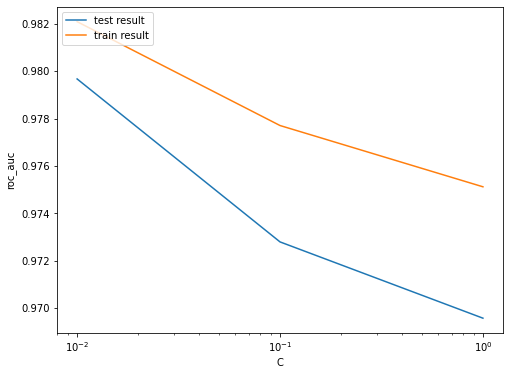

In [33]:
from sklearn.model_selection import GridSearchCV

# Specify params
params = {"C": [0.01, 0.1, 1]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train.astype(int))

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("\n\nThe highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

## Optimal Logistic Model with Imbalanced Data

In [34]:
# Instantiate the model with best C
logistic_imb_model = LogisticRegression(C=0.01)
logistic_imb_model.fit(X_train,y_train)

LogisticRegression(C=0.01)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[198999     23]
 [   134    208]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9992124957364419
----------------------------------------------------------------------------------------------------
Sensitivity:  0.6081871345029239
----------------------------------------------------------------------------------------------------
Specificity:  0.9998844348865954
----------------------------------------------------------------------------------------------------
F1-Score:  0.7260034904013961
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       0.90      0.61      0.73       342

    accuracy                           1.00    19

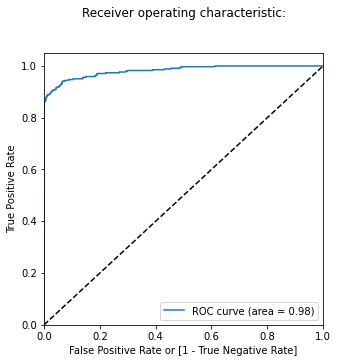

In [35]:
#Prediction on the train set
model_summary(logistic_imb_model, X_train, y_train,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85281    12]
 [   67    83]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9990754069964772
----------------------------------------------------------------------------------------------------
Sensitivity:  0.5533333333333333
----------------------------------------------------------------------------------------------------
Specificity:  0.9998593085012838
----------------------------------------------------------------------------------------------------
F1-Score:  0.6775510204081634
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.87      0.55      0.68       150

    accuracy                           1.00     85443


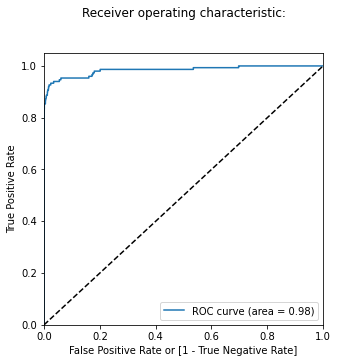

In [36]:
#Prediction on the test set
model_summary(logistic_imb_model, X_test, y_test,"Test")

### Logistic Regression on Imbalanced Data

#### Model summary

We can see that we have very good ROC on the test set 0.98, which is almost close to 1.


| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.98 |
| Sensitivity | 0.60 | 0.53 |
| Specificity	 | 0.99 | 0.99 |
| F1-Score | 0.72 | 0.67 |
| ROC | 0.98 | 0.98 |


Overall, the model is performing well in the test set, what it had learnt from the train set.

## XGBoost with Imbalanced Data

In [37]:
# Importing XGBoost

from xgboost import XGBClassifier

# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

[10:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [38]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,20.096287,0.392864,0.110258,0.001696,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.967660,0.977877,0.980512,0.975350,0.005543,2,0.999925,0.999814,0.999787,0.999842,0.000060
1,26.323237,0.513807,0.111736,0.004447,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.964506,0.977986,0.981658,0.974717,0.007374,3,0.999991,0.999983,0.999986,0.999987,0.000004
2,33.743901,1.496676,0.116342,0.002565,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977700,0.980354,0.981461,0.979838,0.001578,1,0.999992,0.999971,0.999986,0.999983,0.000009
3,18.104700,0.883501,0.112534,0.006130,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.965255,0.970116,0.957927,0.964433,0.005010,6,0.999999,0.999999,0.999996,0.999998,0.000001
4,23.534429,0.574821,0.106040,0.006516,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.961449,0.974269,0.981166,0.972295,0.008170,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,28.122909,0.817945,0.100145,0.004378,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.969518,0.977668,0.975945,0.974377,0.003507,4,1.000000,1.000000,1.000000,1.000000,0.000000


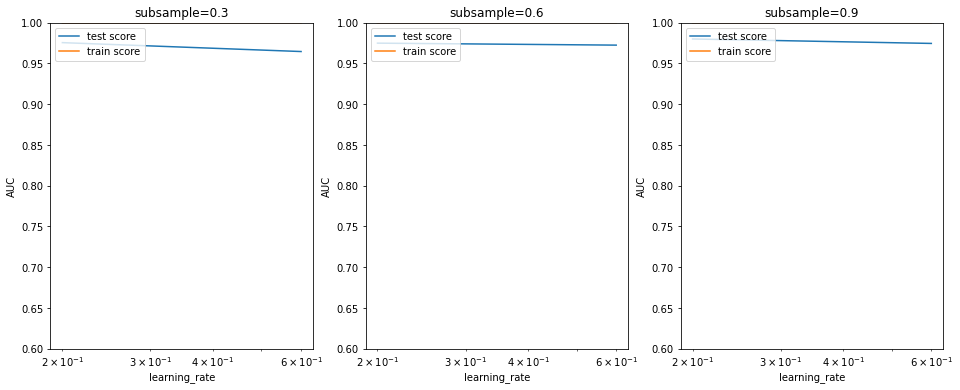

In [39]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

In [40]:
print(model_cv.best_params_)

# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

{'learning_rate': 0.2, 'subsample': 0.9}
[10:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:55:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Prediction on the train set

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199022      0]
 [     0    342]]
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  1.0
----------------------------------------------------------------------------------------------------
F1-Score:  1.0
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       1.00      1.00      1.00       342

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
w

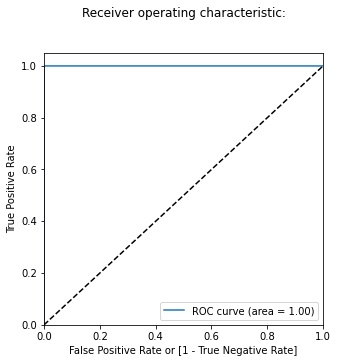

In [41]:
#Prediction on the train set
model_summary(xgb_imb_model, X_train, y_train,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85286     7]
 [   34   116]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9995201479348805
----------------------------------------------------------------------------------------------------
Sensitivity:  0.7733333333333333
----------------------------------------------------------------------------------------------------
Specificity:  0.9999179299590822
----------------------------------------------------------------------------------------------------
F1-Score:  0.8498168498168499
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.94      0.77      0.85       150

    accuracy                           1.00     85443


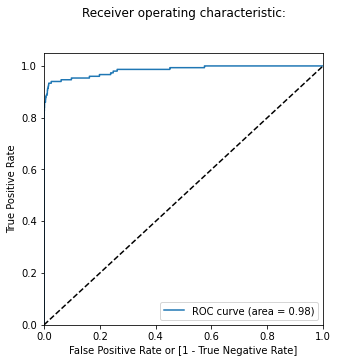

In [42]:
#Prediction on the test set
model_summary(xgb_imb_model, X_test, y_test,"Test")

### XGBoost with Imbalanced Data

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.99 |
| Sensitivity | 0.85 | 0.75 |
| Specificity	 | 0.99 | 0.99 |
| F1-Score | 0.90 | 0.79 |
| ROC | 0.99 | 0.98 |


# Decision Tree with Imbalanced Data

In [89]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 100, 50),
    'min_samples_split': range(50, 100, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results)

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.603629      0.156219         0.012542        0.004357   
1       5.674271      0.261947         0.019202        0.003550   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1              10                     50                      50   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.903052   
1  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.914795   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.945764           0.925189         0.924668        0.017441   
1           0.969548           0.945351         0.943231        0.022403   

   rank_test_score  
0                2  
1                1  
Best roc_auc:- 0

In [90]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[198992     30]
 [   153    189]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9990820810176361
----------------------------------------------------------------------------------------------------
Sensitivity:  0.5526315789473685
----------------------------------------------------------------------------------------------------
Specificity:  0.9998492628955593
----------------------------------------------------------------------------------------------------
F1-Score:  0.6737967914438503
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       0.86      0.55      0.67       342

    accuracy                           1.00    19

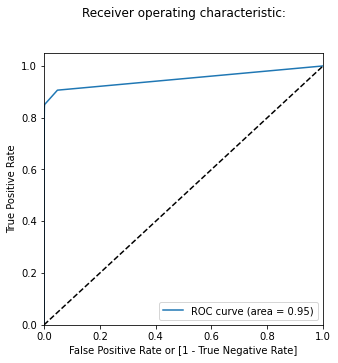

In [91]:
#Prediction on the train set
model_summary(dt_imb_model, X_train, y_train,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85281    12]
 [   76    74]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9989700736163291
----------------------------------------------------------------------------------------------------
Sensitivity:  0.49333333333333335
----------------------------------------------------------------------------------------------------
Specificity:  0.9998593085012838
----------------------------------------------------------------------------------------------------
F1-Score:  0.6271186440677966
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.86      0.49      0.63       150

    accuracy                           1.00     85443

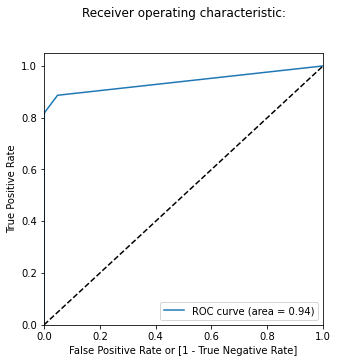

In [92]:
#Prediction on the test set
model_summary(dt_imb_model, X_test, y_test,"Test")

### Decision Tree on Imbalanced Data

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.99 |
| Sensitivity | 0.52 | 0.49 |
| Specificity	 | 0.99 | 0.99 |
| F1-Score | 0.67 | 0.62 |
| ROC | 0.95 | 0.94 |



# Random Forest with Imbalanced Data

In [43]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,250], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 250]},
             return_train_score=True, verbose=1)

In [44]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[198979     43]
 [    98    244]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9992927509480147
----------------------------------------------------------------------------------------------------
Sensitivity:  0.7134502923976608
----------------------------------------------------------------------------------------------------
Specificity:  0.999783943483635
----------------------------------------------------------------------------------------------------
F1-Score:  0.7758346581875993
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       0.85      0.71      0.78       342

    accuracy                           1.00    199

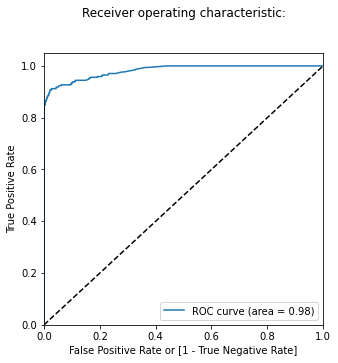

In [151]:
#Prediction on the train set
model_summary(rfc_imb_model, X_train, y_train,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85279    14]
 [   52    98]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9992275552122467
----------------------------------------------------------------------------------------------------
Sensitivity:  0.6533333333333333
----------------------------------------------------------------------------------------------------
Specificity:  0.9998358599181645
----------------------------------------------------------------------------------------------------
F1-Score:  0.7480916030534351
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.88      0.65      0.75       150

    accuracy                           1.00     85443


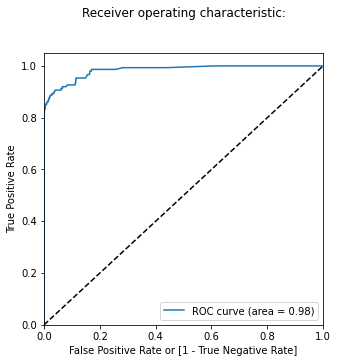

In [152]:
#Prediction on the test set
model_summary(rfc_imb_model, X_test, y_test,"Test")

### Random Forest on Imbalanced Data

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.99 |
| Sensitivity | 0.71 | 0.65 |
| Specificity	 | 0.99 | 0.99 |
| F1-Score | 0.77 | 0.74 |
| ROC | 0.98 | 0.98 |



### The important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [158]:
clf = xgb_imb_model  #initialise the model with optimum hyperparameters
#clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_train_pred = clf.predict(X_train)
class_report = classification_report(y_train_pred, y_train)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       1.00      1.00      1.00       342

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



Top var     = 17
2nd Top var = 14
3rd Top var = 10


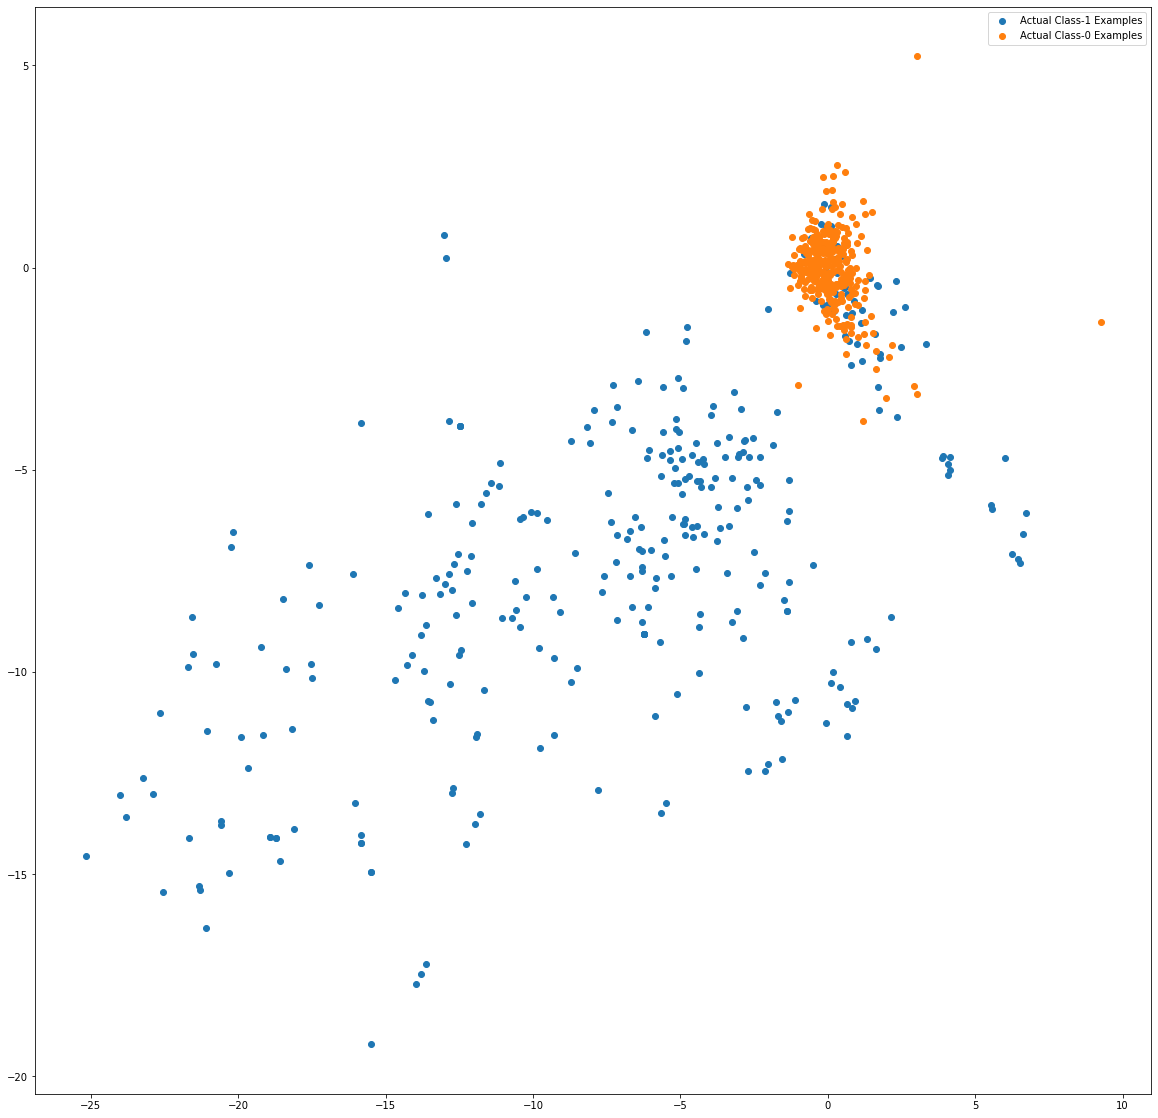

In [161]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var     =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

# Handling Class Imbalance

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Random Oversampling

In [50]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [51]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 199022, 1: 342})
New class distribution:- Counter({0: 199022, 1: 199022})


## Logistic Regression with Random Oversampling

In [162]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10,100]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [163]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.720706,0.243046,0.048334,0.007774,0.01,{'C': 0.01},0.985955,0.985245,0.985300,0.985906,...,0.985475,0.000389,5,0.985356,0.985498,0.985597,0.985383,0.985647,0.985496,0.000114
1,3.996229,0.308160,0.053320,0.007539,0.1,{'C': 0.1},0.986269,0.985533,0.985640,0.986199,...,0.985787,0.000383,4,0.985640,0.985805,0.985944,0.985683,0.985954,0.985805,0.000129
2,3.880443,0.230364,0.050018,0.006240,1,{'C': 1},0.986319,0.985573,0.985690,0.986244,...,0.985834,0.000383,3,0.985680,0.985850,0.985993,0.985729,0.986000,0.985850,0.000132
3,3.902312,0.230465,0.051701,0.006284,10,{'C': 10},0.986325,0.985578,0.985693,0.986248,...,0.985838,0.000383,2,0.985684,0.985854,0.985998,0.985734,0.986005,0.985855,0.000132
4,3.943335,0.112401,0.056269,0.007677,100,{'C': 100},0.986325,0.985578,0.985694,0.986249,...,0.985839,0.000384,1,0.985684,0.985854,0.985998,0.985734,0.986005,0.985855,0.000132


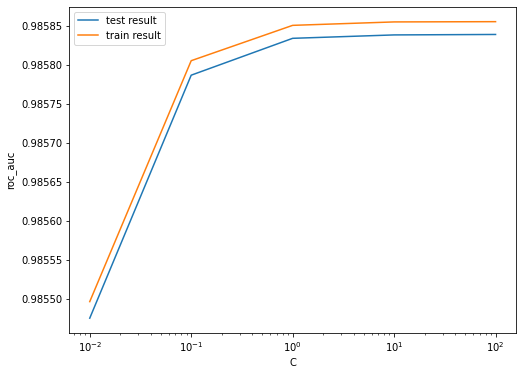

In [164]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [165]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9858387096339014 at C = 100


## Logistic Regression with optimal C

In [169]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=100)

# Fit the model on the train set
logistic_bal_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(C=100)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[194304   4718]
 [ 17626 181396]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9438655023062777
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9114369265709319
----------------------------------------------------------------------------------------------------
Specificity:  0.9762940780416235
----------------------------------------------------------------------------------------------------
F1-Score:  0.9419841302812514
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    199022
           1       0.97      0.91      0.94    199022

    accuracy                           0.94    39

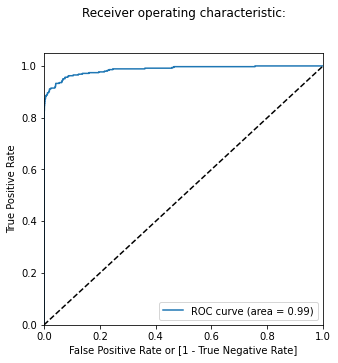

In [170]:
#Prediction on the train set
model_summary(logistic_bal_ros, X_train_ros, y_train_ros,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[83276  2017]
 [   10   140]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9762765820488513
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9333333333333333
----------------------------------------------------------------------------------------------------
Specificity:  0.9763521039241204
----------------------------------------------------------------------------------------------------
F1-Score:  0.12136974425661033
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85293
           1       0.06      0.93      0.12       150

    accuracy                           0.98     85443

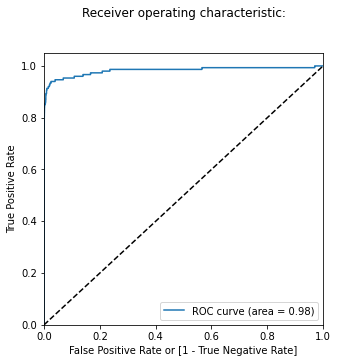

In [168]:
#Prediction on the test set
model_summary(logistic_bal_ros, X_test, y_test,"Test")

### Logistic Regression with Random Oversampling

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.94 | 0.97 |
| Sensitivity | 0.91 | 0.93 |
| Specificity	 | 0.97 | 0.97 |
| F1-Score | 0.94 | 0.12 |
| ROC | 0.99 | 0.98 |



# Decision Tree with Random Oversampling

In [109]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results)

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.203508      0.127326         0.030670        0.000875   
1       3.071163      0.142235         0.053671        0.008313   
2       2.930655      0.066841         0.051260        0.014139   
3       3.160290      0.096860         0.045685        0.001205   
4       4.213712      0.144576         0.046868        0.007065   
5       4.508178      0.448406         0.044428        0.011563   
6       4.525373      0.133635         0.038375        0.002234   
7       4.610838      0.193149         0.059008        0.010436   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100

In [110]:
# Model with optimal hyperparameters
dt_model_ros = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_model_ros.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[197828   1194]
 [     0 199022]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9970003316216298
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  0.9940006632432595
----------------------------------------------------------------------------------------------------
F1-Score:  0.9970093027216849
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    199022
           1       0.99      1.00      1.00    199022

    accuracy                           1.00    398044
   macro a

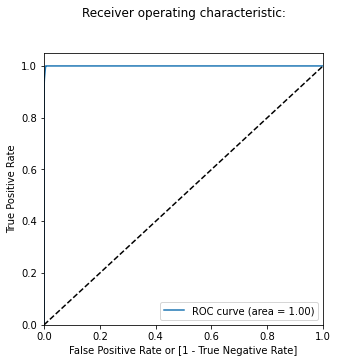

In [111]:
#Prediction on the train set
model_summary(dt_model_ros, X_train_ros, y_train_ros,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[84789   504]
 [   25   125]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9938087379890688
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8333333333333334
----------------------------------------------------------------------------------------------------
Specificity:  0.99409095705392
----------------------------------------------------------------------------------------------------
F1-Score:  0.3209242618741977
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85293
           1       0.20      0.83      0.32       150

    accuracy                           0.99     85443
  

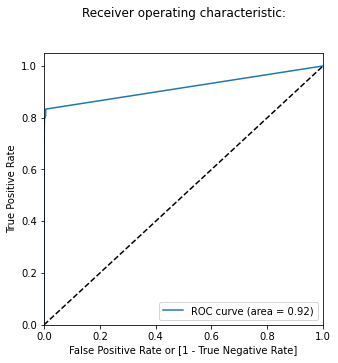

In [112]:
#Prediction on the test set
model_summary(dt_model_ros, X_test, y_test,"Test")

### Decision Tree with Random Oversampling

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.99 |
| Sensitivity | 0.99 | 0.83 |
| Specificity	 | 0.99 | 0.99 |
| F1-Score | 0.99 | 0.32 |
| ROC | 0.99 | 0.92 |



## XGBoost with Random Oversampling

In [59]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)  
print('\nModel trainging has been completed')

[11:42:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [60]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,32.292991,0.163086,0.207607,0.002646,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999965,0.999884,0.999913,0.999921,0.000034,5,0.999935,0.999930,0.999949,0.999938,8.308389e-06
1,42.699867,0.358154,0.206338,0.008429,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999963,0.999888,0.999913,0.999921,0.000031,4,0.999939,0.999937,0.999940,0.999939,1.297040e-06
2,45.013331,1.559288,0.219728,0.010416,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999954,0.999893,0.999907,0.999918,0.000026,6,0.999920,0.999940,0.999937,0.999933,8.957519e-06
3,32.009665,0.056128,0.198886,0.001126,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999986,0.999977,0.999967,0.999977,0.000008,3,1.000000,0.999999,0.999997,0.999999,1.005172e-06
4,41.137752,0.183976,0.205205,0.002682,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999991,0.999975,0.999983,0.999983,0.000006,2,1.000000,1.000000,1.000000,1.000000,6.174934e-08
5,44.241321,0.455734,0.194152,0.011356,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999985,0.999989,0.999979,0.999985,0.000004,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00


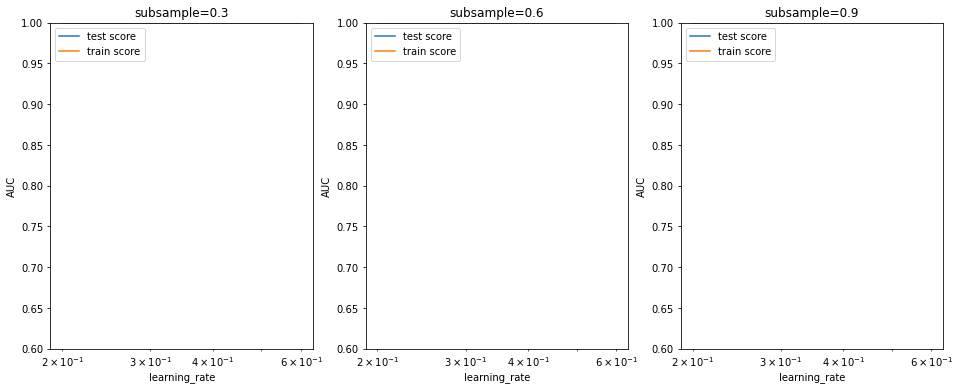

In [61]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [62]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [63]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[11:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199022      0]
 [     0 199022]]
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  1.0
----------------------------------------------------------------------------------------------------
F1-Score:  1.0
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       1.00      1.00      1.00    199022

    accuracy                           1.00    398044
   macro avg       1.00      1.00      1.00    398044
w

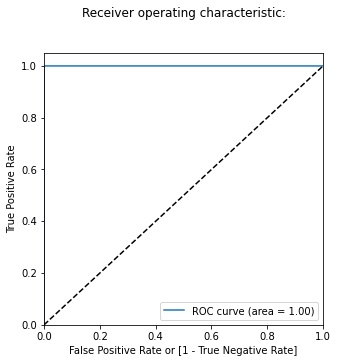

In [64]:
#Prediction on the train set
model_summary(xgb_bal_ros_model, X_train_ros, y_train_ros,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85281    12]
 [   28   122]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9995318516437859
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8133333333333334
----------------------------------------------------------------------------------------------------
Specificity:  0.9998593085012838
----------------------------------------------------------------------------------------------------
F1-Score:  0.8591549295774649
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.91      0.81      0.86       150

    accuracy                           1.00     85443


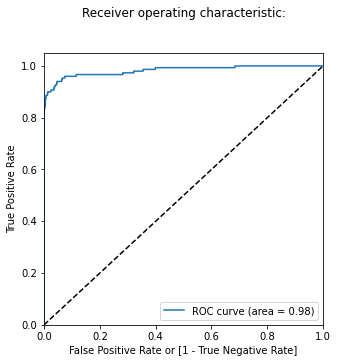

In [65]:
#Prediction on the test set
model_summary(xgb_bal_ros_model, X_test, y_test,"Test")

### XGBoost with Random Oversampling

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.99 |
| Sensitivity | 0.99 | 0.81 |
| Specificity	 | 0.99 | 0.99 |
| F1-Score | 0.99 | 0.85 |
| ROC | 0.99 | 0.98 |



# SMOTE (Synthetic Minority Oversampling Technique)

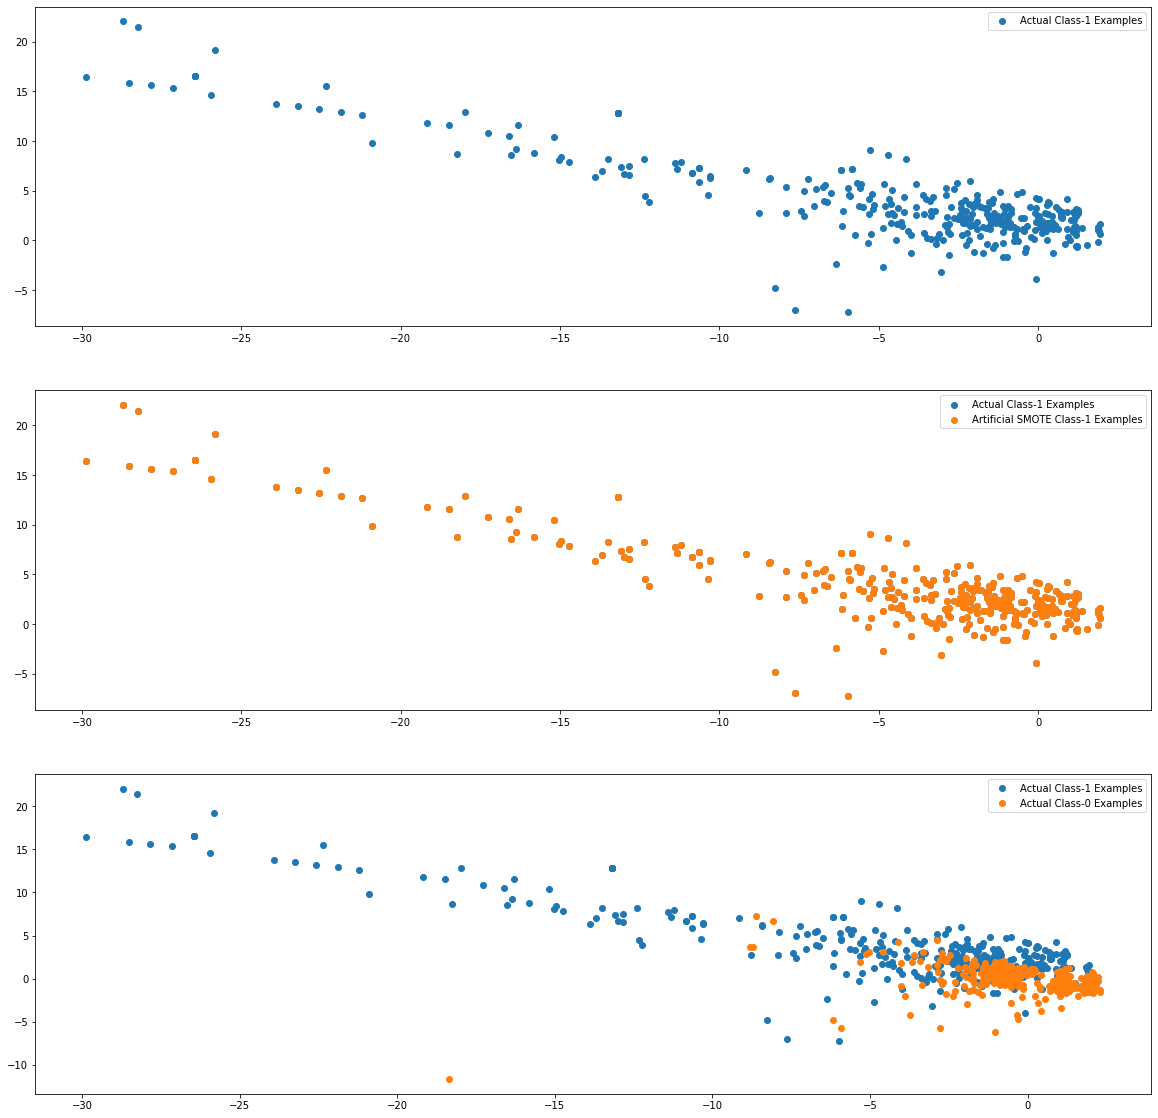

In [195]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
#X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_smote_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [66]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 199022, 1: 342})
New class distribution:- Counter({0: 199022, 1: 199022})


# Logistic Regression with SMOTE

Fitting 5 folds for each of 4 candidates, totalling 20 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       3.523077      0.140980         0.058641        0.002193    0.01   
1       4.781946      0.314658         0.055397        0.000803     0.1   
2       4.756942      0.135277         0.056696        0.002911       1   
3       4.956586      0.591189         0.056892        0.002692      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988250           0.987937           0.987784   
1   {'C': 0.1}           0.988585           0.988257           0.988156   
2     {'C': 1}           0.988657           0.988323           0.988233   
3    {'C': 10}           0.988664           0.988330           0.988241   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.987819  ...         0.987905        0.000185                4   
1           0.988135  ...     

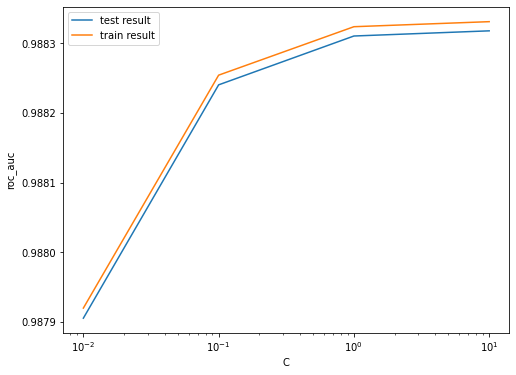

 The highest test roc_auc is 0.9883180346177822 at C = 10


In [67]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10]}

X = X_train_smote
y = y_train_smote

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X, y)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.show()



# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

## Logistic regression with optimal C

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[193872   5150]
 [ 18041 180981]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9417375968485896
----------------------------------------------------------------------------------------------------
Sensitivity:  0.909351729959502
----------------------------------------------------------------------------------------------------
Specificity:  0.9741234637376772
----------------------------------------------------------------------------------------------------
F1-Score:  0.9397875649417246
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    199022
           1       0.97      0.91      0.94    199022

    accuracy                           0.94    398

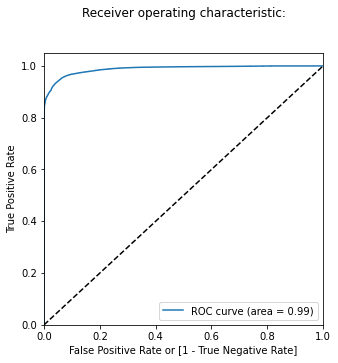

In [68]:
#Prediction on the train set

model = LogisticRegression(C=0.1)

X = X_train_smote
y = y_train_smote


model.fit(X,y)
model_summary(model, X_train_smote, y_train_smote,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[83079  2214]
 [   12   138]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9739475439766863
----------------------------------------------------------------------------------------------------
Sensitivity:  0.92
----------------------------------------------------------------------------------------------------
Specificity:  0.9740424184868629
----------------------------------------------------------------------------------------------------
F1-Score:  0.11031175059952039
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.92      0.11       150

    accuracy                           0.97     85443
   macro avg 

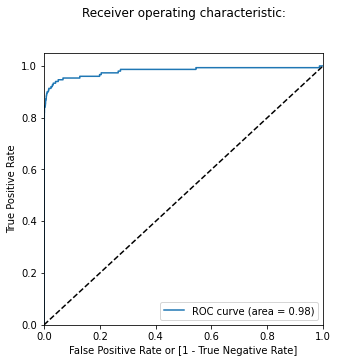

In [69]:
#Prediction on the test set
model_summary(model, X_test, y_test,"Test")

### Logistic Regression with SMOTE

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.94 | 0.97 |
| Sensitivity | 0.90 | 0.92 |
| Specificity | 0.97 | 0.97 |
| F1-Score | 0.93 | 0.11 |
| ROC | 0.99 | 0.98 |



## XGBoost on SMOTE

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[11:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:01:04]

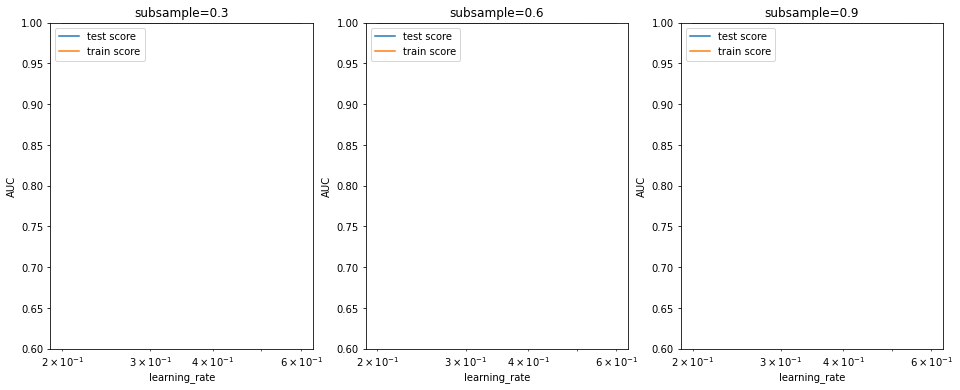

In [70]:
# Specify params
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}

X = X_train_smote
y = y_train_smote

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X, y)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


print(model_cv.best_params_)

In [71]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[12:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199020      2]
 [     0 199022]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9999949754298519
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  0.999989950859704
----------------------------------------------------------------------------------------------------
F1-Score:  0.9999949754550982
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       1.00      1.00      1.00    199022

    accuracy                           1.00    398044
   macro av

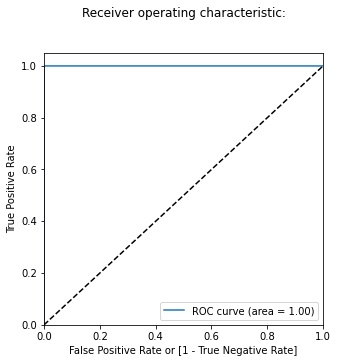

In [72]:
#Prediction on the train set
model_summary(xgb_bal_smote_model, X_train_smote, y_train_smote,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85252    41]
 [   27   123]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.999204147794436
----------------------------------------------------------------------------------------------------
Sensitivity:  0.82
----------------------------------------------------------------------------------------------------
Specificity:  0.999519304046053
----------------------------------------------------------------------------------------------------
F1-Score:  0.7834394904458599
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.75      0.82      0.78       150

    accuracy                           1.00     85443
   macro avg    

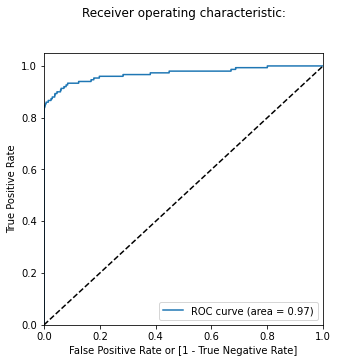

In [73]:
#Prediction on the test set
model_summary(xgb_bal_smote_model, X_test, y_test,"Test")

### XGBoost with SMOTE

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.99 |
| Sensitivity | 0.99 | 0.82 |
| Specificity	 | 0.99 | 0.99 |
| F1-Score | 0.99 | 0.78 |
| ROC | 0.99 | 0.97 |



# Decision Tree with SMOTE

In [94]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)


# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results)

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.918281      0.224340         0.041672        0.007370   
1       4.948825      0.303487         0.055841        0.009345   
2       5.310321      0.489683         0.034655        0.002680   
3       5.187283      0.120873         0.036262        0.000488   
4       9.574856      0.539201         0.039994        0.006515   
5       9.821408      0.476841         0.050205        0.011665   
6       9.500412      0.437291         0.049133        0.015377   
7      10.095220      0.608820         0.053855        0.019443   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100

In [95]:
# Model with optimal hyperparameters
dt_model_smote = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_model_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[195520   3502]
 [  1361 197661]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9877827576850801
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9931615600285396
----------------------------------------------------------------------------------------------------
Specificity:  0.9824039553416205
----------------------------------------------------------------------------------------------------
F1-Score:  0.987848120244387
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    199022
           1       0.98      0.99      0.99    199022

    accuracy                           0.99    398

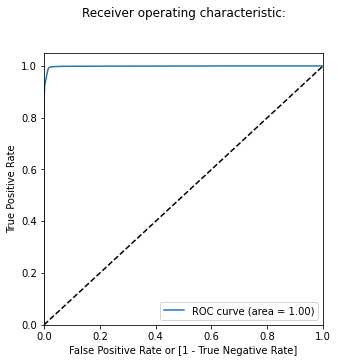

In [96]:
#Prediction on the train set
model_summary(dt_model_smote, X_train_smote, y_train_smote,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[83708  1585]
 [   22   128]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9811921397890991
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8533333333333334
----------------------------------------------------------------------------------------------------
Specificity:  0.9814169978779033
----------------------------------------------------------------------------------------------------
F1-Score:  0.1374127750939345
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85293
           1       0.07      0.85      0.14       150

    accuracy                           0.98     85443


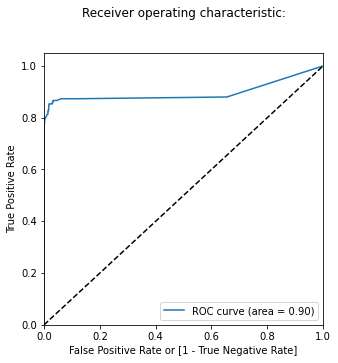

In [97]:
#Prediction on the test set
model_summary(dt_model_smote, X_test, y_test,"Test")

### Decision Tree with SMOTE

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.98 | 0.98 |
| Sensitivity | 0.99 | 0.85 |
| Specificity | 0.98 | 0.98 |
| F1-Score | 0.98 | 0.13 |
| ROC | 0.99 | 0.90 |



# ADASYN (Adaptive Synthetic Sampling)

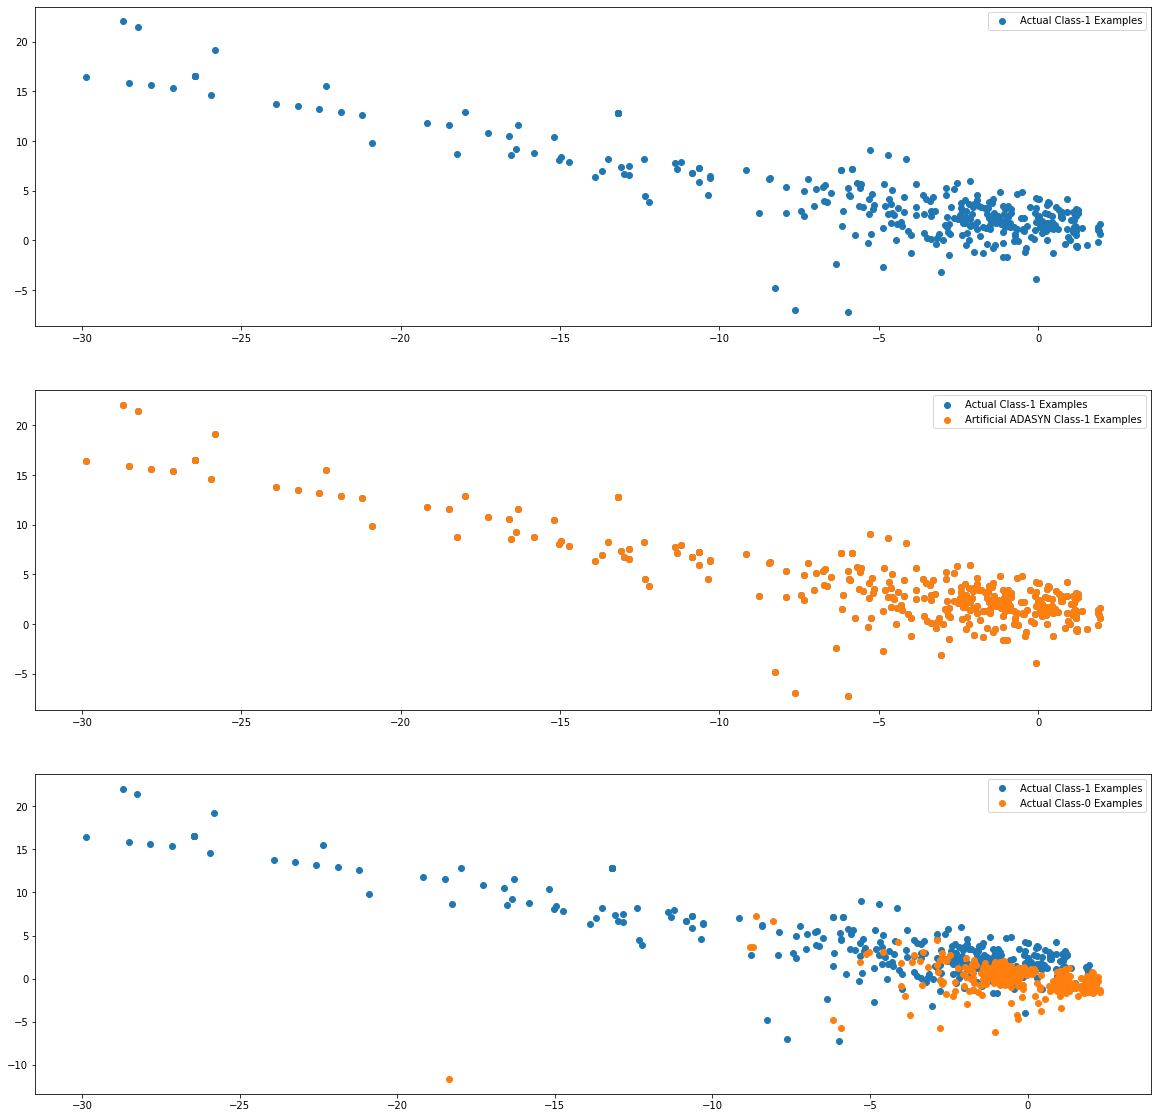

In [199]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
#X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_adasyn_1 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==1.0)]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [75]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 199022, 1: 342})
New class distribution:- Counter({0: 199022, 1: 199002})


# Logistic Regression with ADASYN

Fitting 5 folds for each of 5 candidates, totalling 25 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       4.084666      0.281124         0.056612        0.005697    0.01   
1       5.277467      0.758856         0.057881        0.002393     0.1   
2       3.704606      0.158968         0.038605        0.012361       1   
3       3.536505      0.329522         0.035690        0.010537      10   
4       3.374174      0.515501         0.036891        0.011074     100   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.968545           0.952889           0.887120   
1   {'C': 0.1}           0.970275           0.943648           0.891642   
2     {'C': 1}           0.970604           0.935906           0.892640   
3    {'C': 10}           0.970637           0.934839           0.892745   
4   {'C': 100}           0.970642           0.934734           0.892757   

   split3_test_score  ...  mean_test_s

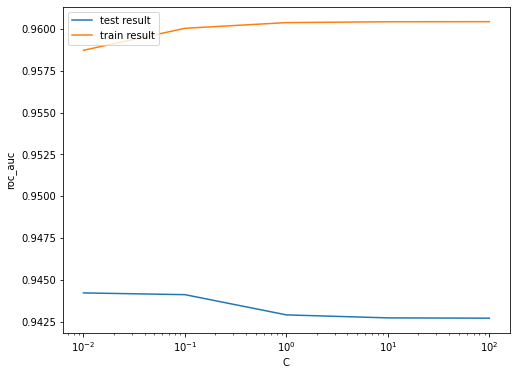

 The highest test roc_auc is 0.944214012855951 at C = 0.01


In [76]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100]}

X = X_train_adasyn
y = y_train_adasyn

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X, y)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.show()



# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

In [77]:
# Logistic regression with optimal C

# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[179629  19393]
 [ 23987 175015]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.8910115972906156
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8794635229796686
----------------------------------------------------------------------------------------------------
Specificity:  0.9025585111193737
----------------------------------------------------------------------------------------------------
F1-Score:  0.8897333570575228
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89    199022
           1       0.90      0.88      0.89    199002

    accuracy                           0.89    39

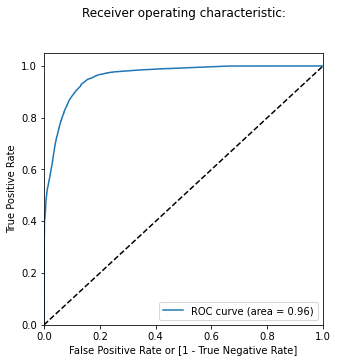

In [78]:
#Prediction on the train set
model_summary(logistic_bal_adasyn_model, X_train_adasyn, y_train_adasyn,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[77029  8264]
 [    7   143]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9031986236438327
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9533333333333334
----------------------------------------------------------------------------------------------------
Specificity:  0.9031104545507838
----------------------------------------------------------------------------------------------------
F1-Score:  0.033422928596470725
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85293
           1       0.02      0.95      0.03       150

    accuracy                           0.90     8544

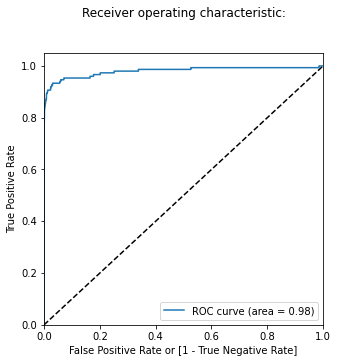

In [79]:
#Prediction on the test set
model_summary(logistic_bal_adasyn_model, X_test, y_test,"Test")

### Logistic Regression with ADASYN

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.89 | 0.90 |
| Sensitivity | 0.87 | 0.95 |
| Specificity | 0.90 | 0.90 |
| F1-Score | 0.88 | 0.03 |
| ROC | 0.96 | 0.98 |



# Decision Tree with ADASYN

In [98]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)


# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results)

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.998619      0.127096         0.031807        0.000788   
1       4.777799      0.036470         0.040202        0.007549   
2       4.781016      0.069136         0.037497        0.006707   
3       4.682741      0.062909         0.036457        0.007361   
4       8.330466      0.209664         0.041676        0.007341   
5       8.377727      0.226939         0.036479        0.007347   
6       8.219445      0.172799         0.043369        0.005755   
7       8.259201      0.244614         0.045354        0.010256   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100

In [102]:
# Model with optimal hyperparameters
dt_model_adasyn = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_model_adasyn.fit(X_train_adasyn, y_train_adasyn)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[191897   7125]
 [  1317 197685]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9787902237051032
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9933819760605421
----------------------------------------------------------------------------------------------------
Specificity:  0.9641999376953302
----------------------------------------------------------------------------------------------------
F1-Score:  0.9790942319693322
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    199022
           1       0.97      0.99      0.98    199002

    accuracy                           0.98    39

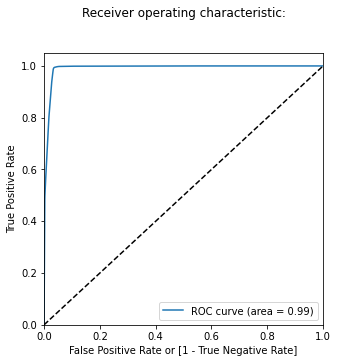

In [103]:
#Prediction on the train set
model_summary(dt_model_adasyn, X_train_adasyn, y_train_adasyn,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[82147  3146]
 [   38   112]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9627353908453589
----------------------------------------------------------------------------------------------------
Sensitivity:  0.7466666666666667
----------------------------------------------------------------------------------------------------
Specificity:  0.9631153787532388
----------------------------------------------------------------------------------------------------
F1-Score:  0.06572769953051644
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85293
           1       0.03      0.75      0.07       150

    accuracy                           0.96     85443

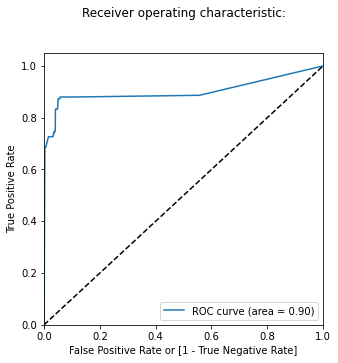

In [104]:
#Prediction on the test set
model_summary(dt_model_adasyn, X_test, y_test,"Test")

### Decision Tree with ADASYN

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.97 | 0.96 |
| Sensitivity | 0.99 | 0.74 |
| Specificity | 0.96 | 0.96 |
| F1-Score | 0.97 | 0.06 |
| ROC | 0.99 | 0.90 |



# XGBoost with ADASYN

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[12:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:01]

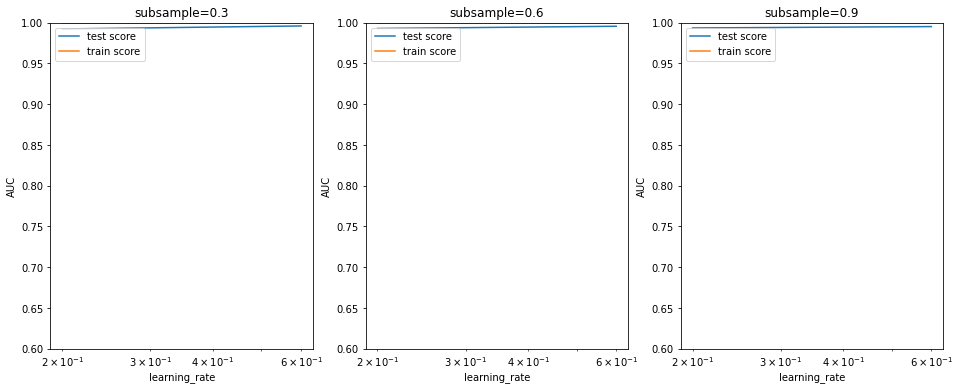

In [80]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn) 

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log') 
    
    
    
print(model_cv.best_params_)

In [81]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

[12:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199021      1]
 [     0 199002]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9999974875886881
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  0.9999949754298519
----------------------------------------------------------------------------------------------------
F1-Score:  0.9999974874687503
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199022
           1       1.00      1.00      1.00    199002

    accuracy                           1.00    398024
   macro a

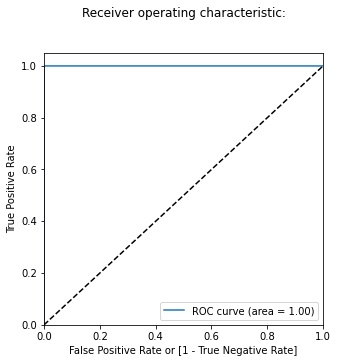

In [82]:
#Prediction on the train set
model_summary(xgb_bal_adasyn_model, X_train_adasyn, y_train_adasyn,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85243    50]
 [   28   122]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9990871107053826
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8133333333333334
----------------------------------------------------------------------------------------------------
Specificity:  0.9994137854220159
----------------------------------------------------------------------------------------------------
F1-Score:  0.7577639751552795
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.71      0.81      0.76       150

    accuracy                           1.00     85443


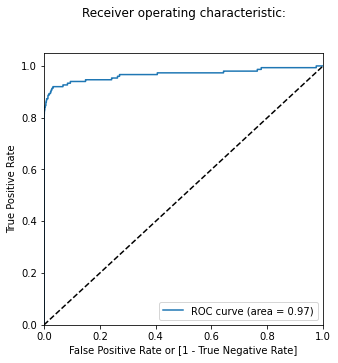

In [83]:
#Prediction on the test set
model_summary(xgb_bal_adasyn_model, X_test, y_test,"Test")

### XGBoost with ADASYN

#### Model summary

| Metric | Train | Test |
| --- | --- | --- |
| Accuracy | 0.99 | 0.99 |
| Sensitivity | 0.99 | 0.81 |
| Specificity | 0.99 | 0.99 |
| F1-Score | 0.99 | 0.75 |
| ROC | 0.99 | 0.97 |



### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [86]:
# perform the best oversampling method on X_train & y_train

clf = xgb_bal_adasyn_model  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset
#print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_train_adasyn_pred_RFC = clf.predict(X_train_adasyn)
#class_report = classification_report(y_test_pred_RFC, y_test)
#print(len(y_train_pred_RFC))
#print(len(y_train_adasyn))
conf_mat = confusion_matrix(y_train_adasyn,y_train_adasyn_pred_RFC)
#print(class_report)
conf_mat

[12:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[199021,      1],
       [     0, 199002]], dtype=int64)

### Print the important features of the best model to understand the dataset

Top var = 17
2nd Top var = 14
3rd Top var = 10


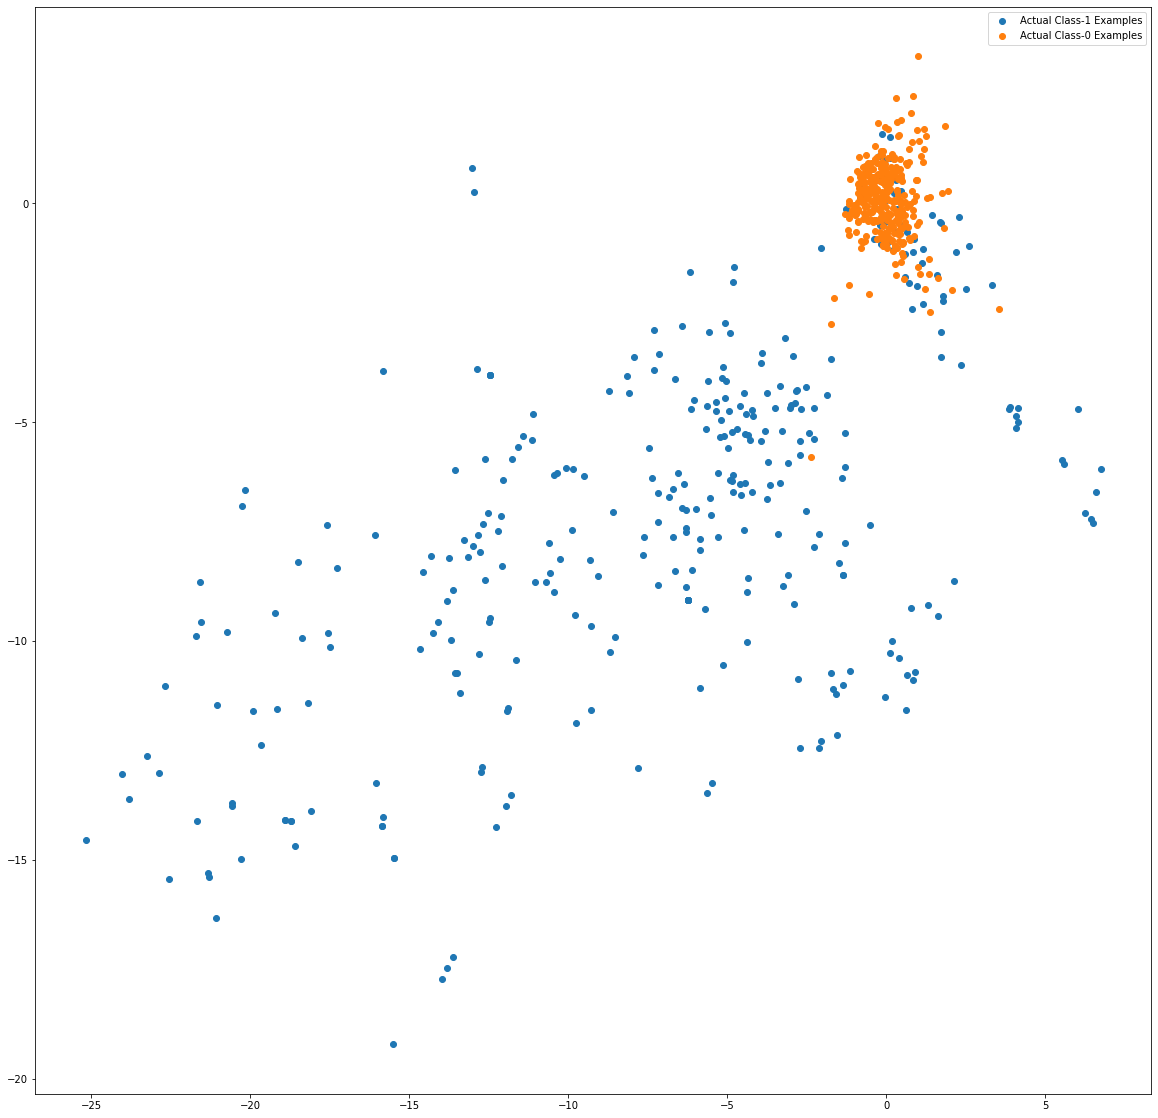

In [200]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [88]:
#### Print the FPR,TPR & select the best threshold from the roc curve
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.8499734


# Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation. Although, finding out the fraudulent transactions is more important than finding out the cause.

Hence, we can conclude that the `XGBoost` model with SMOTE is the best model for its best performance on classification.

In [208]:
#Model results were saved to excel file
model_results_train = pd.read_excel(r"C:\Users\ChiGa\Desktop\PGD Capstone\model_result.xlsx",sheet_name='train')
model_results_test = pd.read_excel(r"C:\Users\ChiGa\Desktop\PGD Capstone\model_result.xlsx",sheet_name='test')

In [260]:
model_results_train

,Model,Accuracy,Sensitivity,Specificity,F1-Score,ROC
0,Logistic Regression (Imbalanced),0.99,0.60,0.99,0.72,0.98
1,XGBoost (Imbalanced),0.99,0.85,0.99,0.90,0.99
2,Decision Tree (Imbalanced),0.99,0.52,0.99,0.67,0.95
3,Random Forest (Imbalanced),0.99,0.71,0.99,0.77,0.98
4,Logistic Regression (ROS),0.94,0.91,0.97,0.94,0.99
5,XGBoost (ROS),0.99,0.99,0.99,0.99,0.99
6,Decision Tree (ROS),0.99,0.99,0.99,0.99,0.99
7,Logistic Regression (SMOTE),0.94,0.90,0.97,0.93,0.99
8,XGBoost (SMOTE),0.99,0.99,0.99,0.99,0.99
9,Decision Tree (SMOTE),0.98,0.99,0.98,0.98,0.99


In [261]:
model_results_test

,Model,Accuracy,Sensitivity,Specificity,F1-Score,ROC
0,Logistic Regression (Imbalanced),0.99,0.53,0.99,0.67,0.98
1,XGBoost (Imbalanced),0.99,0.75,0.99,0.79,0.98
2,Decision Tree (Imbalanced),0.99,0.49,0.99,0.62,0.94
3,Random Forest (Imbalanced),0.99,0.65,0.99,0.74,0.98
4,Logistic Regression (ROS),0.97,0.93,0.97,0.12,0.98
5,XGBoost (ROS),0.99,0.81,0.99,0.85,0.98
6,Decision Tree (ROS),0.99,0.83,0.99,0.32,0.92
7,Logistic Regression (SMOTE),0.97,0.92,0.97,0.11,0.98
8,XGBoost (SMOTE),0.99,0.82,0.99,0.78,0.97
9,Decision Tree (SMOTE),0.98,0.85,0.98,0.13,0.90


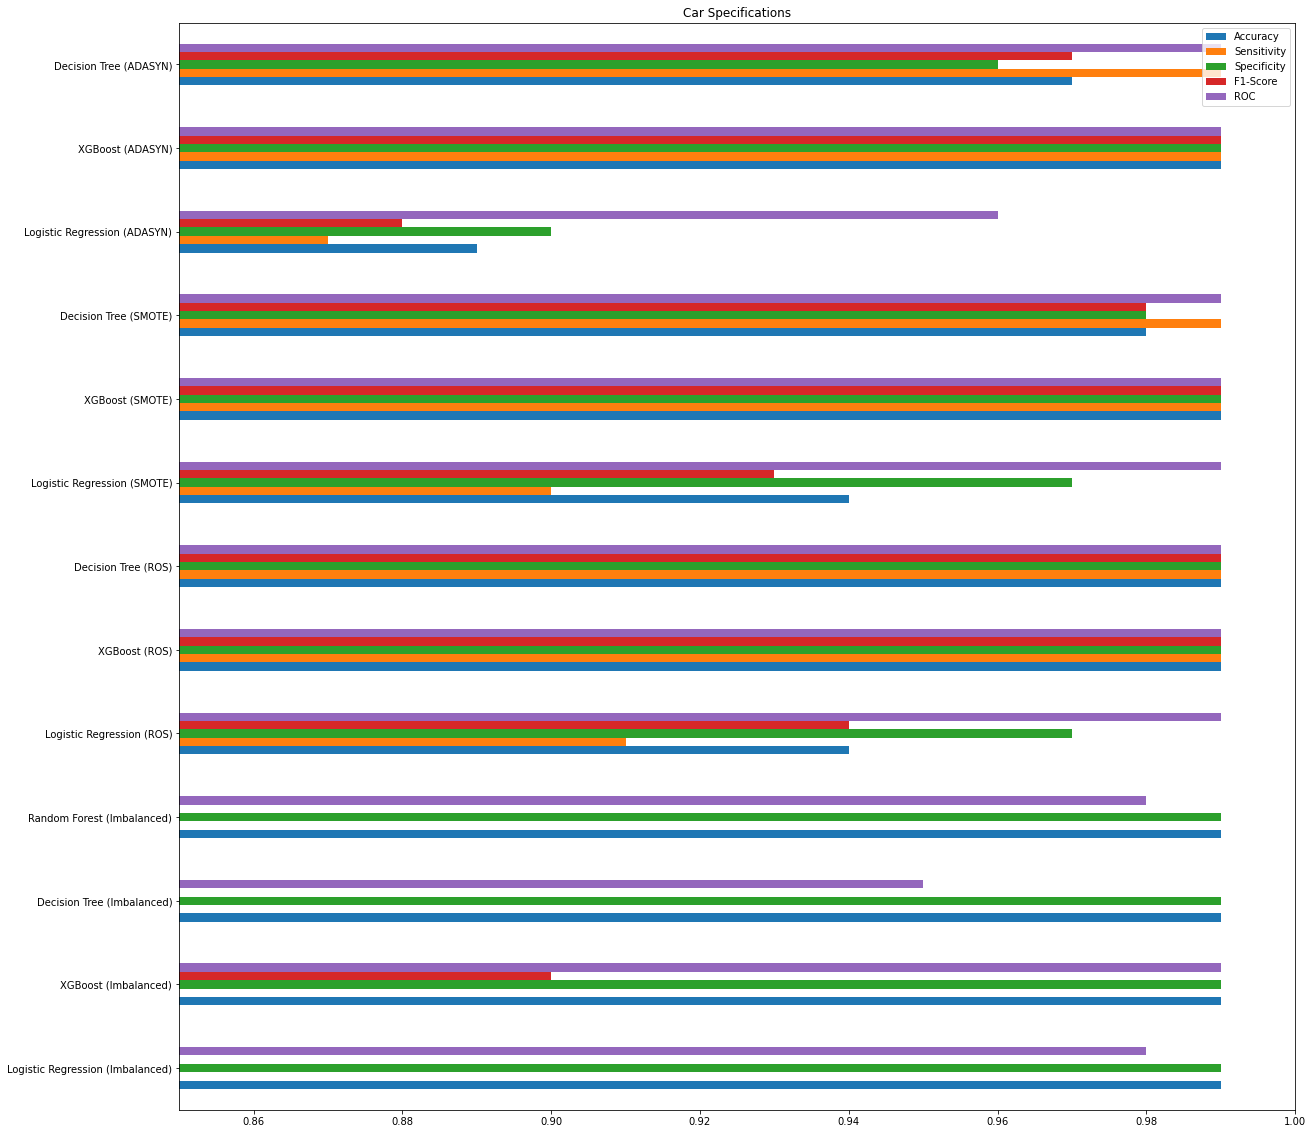

In [258]:
model_results_train.plot.barh(title='Car Specifications',xlim=[0.85,1])
y = list(model_results_train['Model'])
plt.yticks(ticks=np.arange(0,13),labels=y)
# display the plotted Horizontal Bar Chart
plt.show()

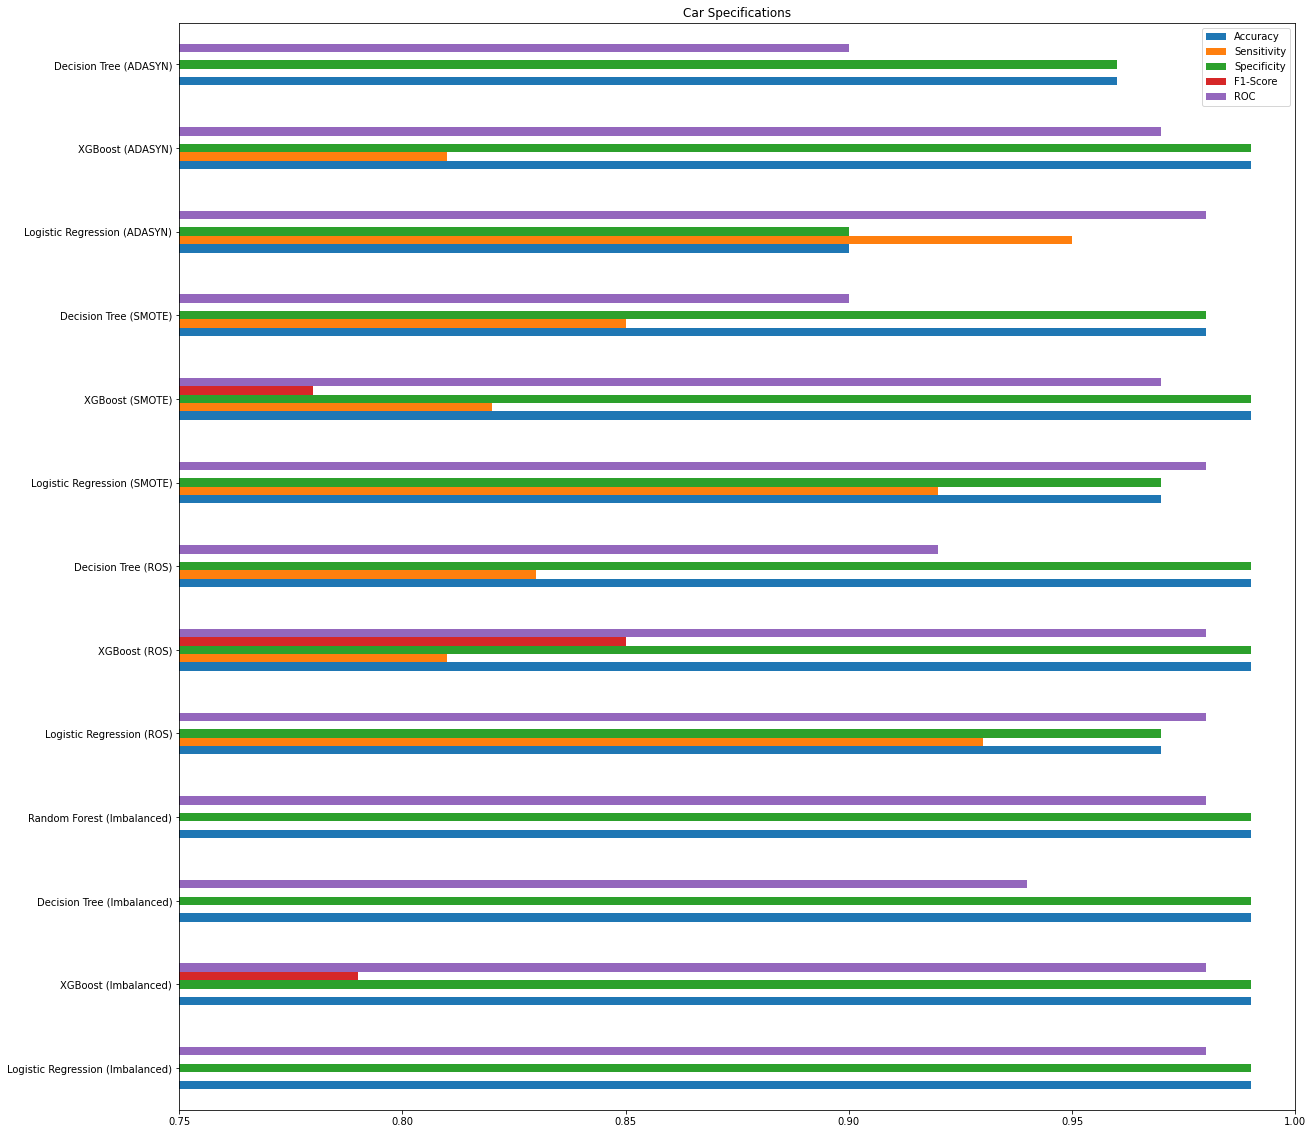

In [259]:
model_results_test.plot.barh(title='Car Specifications',xlim=[0.75,1])
y = list(model_results_train['Model'])
plt.yticks(ticks=np.arange(0,13),labels=y)
# display the plotted Horizontal Bar Chart
plt.show()

# Summary to the Business

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the XGBoost model has good ROC score and also high Recall. Hence, we can go with the XGBoost model here.

# Thank You!



### <b> Author </b>:

  - Chinmay Gaikwad 